In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv("amazon_prime_titles.csv")
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [3]:
file.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [4]:
file['duration'] = file['duration'].str.replace('min',' ')

In [5]:
file['show_id']  = file['show_id'].str.replace('s',' ')

In [6]:
file.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,False,False,False,False,False,True,True,False,False,False,False,False
9664,False,False,False,True,False,True,True,False,False,False,False,False
9665,False,False,False,False,False,True,True,False,False,False,False,False
9666,False,False,False,True,False,True,True,False,False,False,False,False


In [7]:
file.fillna({'director': 'Unknown','cast':'Unknown'}, inplace= True)

In [8]:
file.drop(columns = ['country','date_added'], inplace= True)
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   release_year  9668 non-null   int64 
 6   rating        9331 non-null   object
 7   duration      9668 non-null   object
 8   listed_in     9668 non-null   object
 9   description   9668 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [9]:
file['rating'].unique()
file['rating'] = file['rating'].replace({"16":"16+",
    "AGES_18_":"18+",
    "AGES_16_":"16+",
    "R":"18+",
    "NC-17":"18+",
    "PG-13":"13+",
    "G":"ALL",
    "ALL_AGES":"ALL",
    "NOT_RATED":"UNRATED",
    "NR":"UNRATED",
    "TV-Y7":"7+",
    "TV-NR":"TV-UNRATED"})
most_common = file.groupby('type')['rating'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
file['rating'] = file['rating'].fillna(most_common)


In [10]:
file.head()

,show_id,type,title,director,cast,release_year,rating,duration,listed_in,description
0,1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,NaN,113,"Comedy, Drama",A small fishing village must procure a local d...
1,2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,NaN,74,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,NaN,69,Documentary,"Pink breaks the mold once again, bringing her ..."
4,5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,NaN,45,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [11]:
file.tail()

,show_id,type,title,director,cast,release_year,rating,duration,listed_in,description
9663,9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",1940,7+,60,Comedy,New York City street principles get an East Si...
9664,9665,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",2008,18+,90,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,9667,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",2010,18+,103,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


In [12]:
file.to_csv('cleaned_amazon_prime_titles.csv', index = False)
file

,show_id,type,title,director,cast,release_year,rating,duration,listed_in,description
0,1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,NaN,113,"Comedy, Drama",A small fishing village must procure a local d...
1,2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,NaN,74,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,NaN,69,Documentary,"Pink breaks the mold once again, bringing her ..."
4,5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,NaN,45,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...
9663,9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",1940,7+,60,Comedy,New York City street principles get an East Si...
9664,9665,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",2008,18+,90,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,9667,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [13]:
new_file = pd.read_csv('cleaned_amazon_prime_titles.csv')

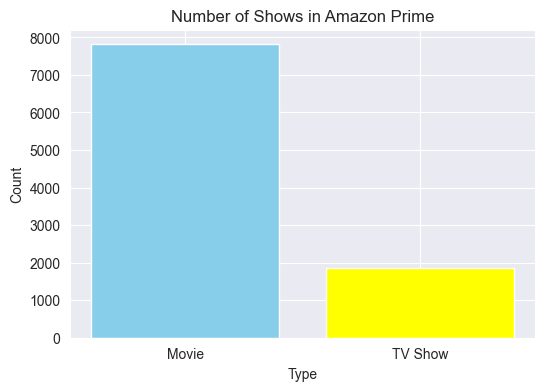

In [14]:
count = new_file['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(count.index,count.values, color = ['skyblue','yellow'])
plt.title("Number of Shows in Amazon Prime")
plt.xlabel("Type")
plt.ylabel("Count")
plt.savefig('amazon_bar.png')
plt.show()

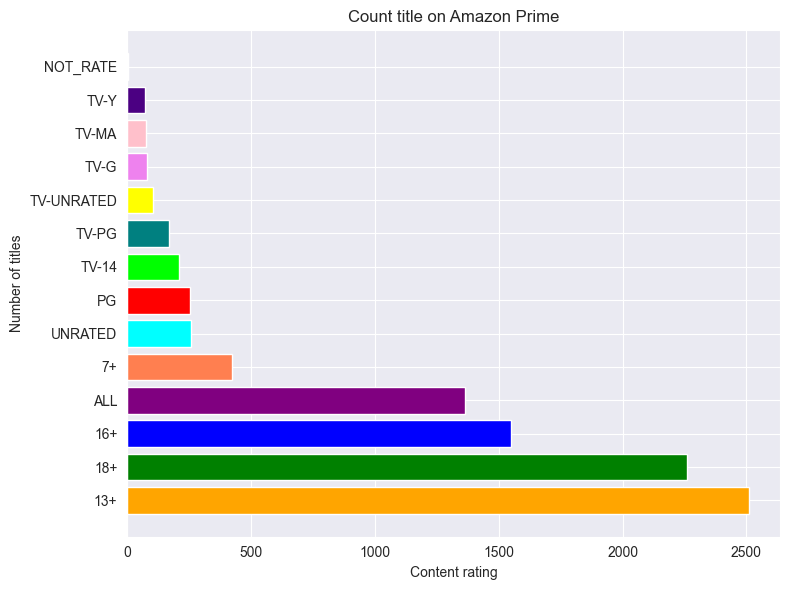

In [15]:
rating = new_file['rating'].value_counts()
plt.figure(figsize = (8,6))
plt.barh(rating.index,rating, color  = ['orange','green','blue','purple','coral','cyan','red','lime','teal','yellow','violet','pink','indigo'])
plt.xlabel("Content rating")
plt.ylabel("Number of titles")
plt.title("Count title on Amazon Prime")
plt.grid(True)
plt.tight_layout()
plt.savefig('amazon_prime_horizontal.png')
plt.show()

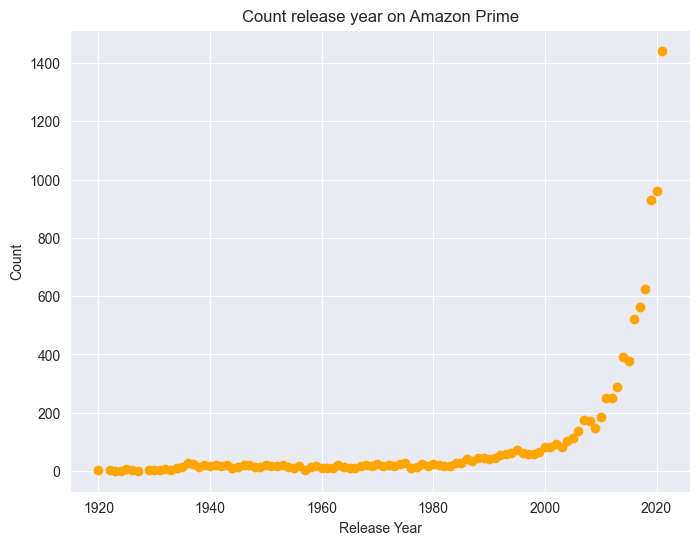

In [16]:
releases = new_file['release_year'].value_counts()
plt.figure(figsize = (8,6))
plt.scatter(releases.index,releases.values, color = 'orange')
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Count release year on Amazon Prime")
plt.show()

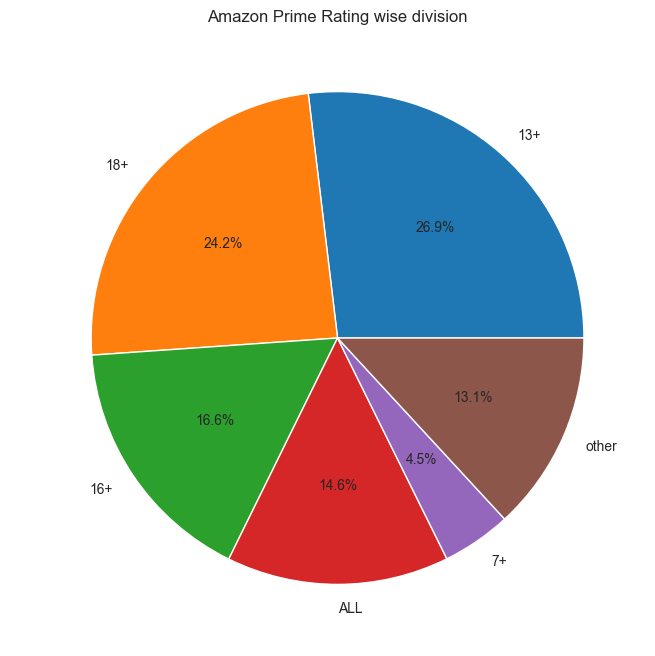

In [17]:
pie_check = new_file['rating'].value_counts()
plt.figure(figsize = (8,8))
top = 5
top_rating = pie_check[:top]
other_rating = pie_check[top:].sum()
top_rating['other'] = other_rating
label  = top_rating.index
value = top_rating.values
plt.tight_layout()
plt.pie(value,labels = label, autopct='%1.1f%%')
plt.title("Amazon Prime Rating wise division")
plt.ylabel(" ")
plt.savefig('amazon_prime_pie.png')
plt.show()